In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("../../../Downloads/mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [56]:
# Handling target mushrooms edible or not: 1 (edible) and 0 (poisonous)
df['class'] = df['class'].apply(lambda x: 0 if x == 'p' else 1)

In [40]:
# Handling categorical variables for predictions
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical Variables:")
print(object_cols)

Categorical Variables:
['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [41]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
# Using OHE for categorical variables
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_object_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))

In [73]:
# Dropping categorical variables first, then concat with categorical variables after OHE process
df.drop(object_cols, axis=1, inplace=True)
df = pd.concat([df, OH_object_cols], axis=1)
df

,class,0,1,2,3,4,5,6,7,8,...,107,108,109,110,111,112,113,114,115,116
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [67]:
from sklearn.model_selection import train_test_split

In [82]:
# Splitting the dataset into 80% training, 20% validation
xtrain, xvalid, ytrain, yvalid = train_test_split(df.drop('class',axis=1), df[['class']], test_size=0.2)

In [86]:
print(len(xtrain),len(xvalid),len(ytrain),len(yvalid))

6499 1625 6499 1625


In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
# Using Logistic Regression for classification
model = LogisticRegression()

In [93]:
# Training model
model.fit(xtrain, np.ravel(ytrain))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
# Prediction using model
pred = model.predict(xvalid)

In [99]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [114]:
# Confusion Matrix
cm = confusion_matrix(yvalid, pred)
print(cm)

[[764   0]
 [  0 861]]


In [122]:
#Classification Report
cr = classification_report(yvalid, pred, target_names=['unedible', 'edible'])
print(cr)

              precision    recall  f1-score   support

    unedible       1.00      1.00      1.00       764
      edible       1.00      1.00      1.00       861

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



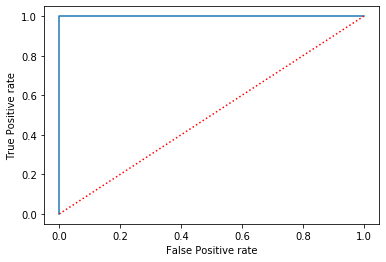

In [110]:
# ROC Curve

fpr, tpr, thres = roc_curve(yvalid, model.predict_proba(xvalid)[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [111]:
# AUC Score
roc_auc_score(yvalid, model.predict_proba(xvalid)[:,1])

1.0